How ARMA models handle non-stationary data (prices)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2 
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

df_comp['market_value']=df_comp.ftse

del df_comp['spx']
del df_comp['dax']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

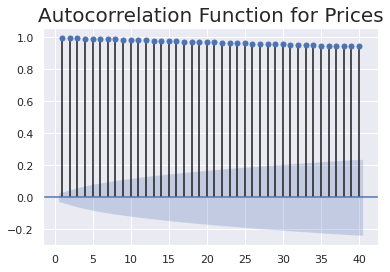

In [3]:
sgt.plot_acf(df.market_value, unbiased=True, zero = False, lags = 40)
plt.title("Autocorrelation Function for Prices",size=20)
plt.show()

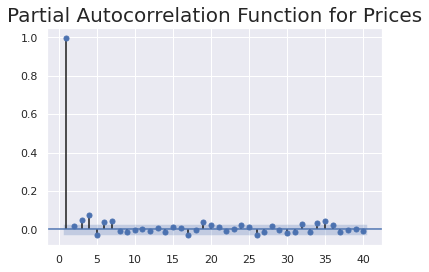

In [4]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("Partial Autocorrelation Function for Prices",size=20)
plt.show()

In [5]:
model_ar_1_ma_1 = ARMA(df.market_value, order=(1,1))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()
print("Variables        pvalues")
if(any(i >0.05 for i in results_ar_1_ma_1.pvalues)):
  print(round(results_ar_1_ma_1.pvalues,3))

Variables        pvalues
const                 0.000
ar.L1.market_value    0.000
ma.L1.market_value    0.203
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


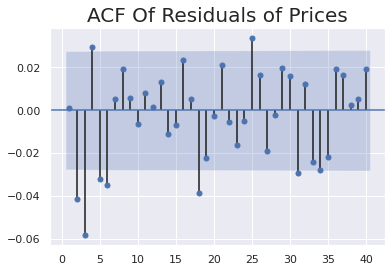

In [6]:
df['res_ar_1_ma_1'] = results_ar_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_ma_1, zero = False, lags = 40)
plt.title("ACF Of Residuals of Prices",size=20)
plt.show()

In [7]:
model_ar_6_ma_6 = ARMA(df.market_value, order=(6,6))
results_ar_6_ma_6 = model_ar_6_ma_6.fit(start_ar_lags = 11)
print("Variables        pvalues")
if(any(i >0.05 for i in results_ar_6_ma_6.pvalues)):
  print(round(results_ar_6_ma_6.pvalues,3))

Variables        pvalues
const                 0.000
ar.L1.market_value    0.000
ar.L2.market_value    0.000
ar.L3.market_value    0.000
ar.L4.market_value    0.131
ar.L5.market_value    0.014
ar.L6.market_value    0.000
ma.L1.market_value    0.000
ma.L2.market_value    0.000
ma.L3.market_value    0.000
ma.L4.market_value    0.323
ma.L5.market_value    0.094
ma.L6.market_value    0.005
dtype: float64


In [8]:
model_ar_5_ma_6 = ARMA(df.market_value, order=(5,6))
results_ar_5_ma_6 = model_ar_5_ma_6.fit(start_ar_lags = 7)
if(any(i >0.05 for i in results_ar_5_ma_6.pvalues)):
  print(round(results_ar_5_ma_6.pvalues,3))

const                 0.000
ar.L1.market_value    0.000
ar.L2.market_value    0.000
ar.L3.market_value    0.000
ar.L4.market_value    0.938
ar.L5.market_value    0.176
ma.L1.market_value    0.033
ma.L2.market_value    0.000
ma.L3.market_value    0.151
ma.L4.market_value    0.224
ma.L5.market_value    0.000
ma.L6.market_value    0.259
dtype: float64


In [9]:
model_ar_6_ma_1 = ARMA(df.market_value, order=(6,1))
results_ar_6_ma_1 = model_ar_6_ma_1.fit(start_ar_lags = 7)
if(any(i >0.05 for i in results_ar_6_ma_1.pvalues)):
  print(round(results_ar_6_ma_1.pvalues,3))


const                 0.000
ar.L1.market_value    0.000
ar.L2.market_value    0.000
ar.L3.market_value    0.683
ar.L4.market_value    0.000
ar.L5.market_value    0.000
ar.L6.market_value    0.000
ma.L1.market_value    0.000
dtype: float64


In [10]:
print("ARMA(5,6):  \t LL = ", results_ar_5_ma_6.llf, "\t AIC = ", results_ar_5_ma_6.aic)
print("ARMA(6,1):  \t LL = ", results_ar_6_ma_1.llf, "\t AIC = ", results_ar_6_ma_1.aic)

ARMA(5,6):  	 LL =  -27587.862948653612 	 AIC =  55201.725897307224
ARMA(6,1):  	 LL =  -27594.194570987143 	 AIC =  55206.38914197429


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


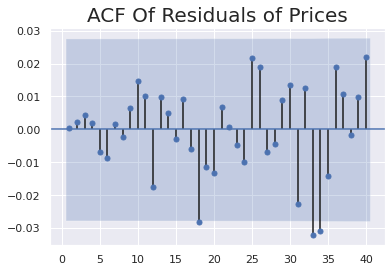

In [11]:
df['res_ar_5_ma_6'] = results_ar_5_ma_6.resid
sgt.plot_acf(df.res_ar_5_ma_6, zero = False, lags = 40)
plt.title("ACF Of Residuals of Prices",size=20)
plt.show()

#in general the plot shows that residuals resemble white noise

In [13]:
print("ARMA(5,6):  \t LL = ", results_ar_5_ma_6.llf, "\t AIC = ", results_ar_5_ma_6.aic)
#not good performance for non-statitionarity

ARMA(5,6):  	 LL =  -27587.862948653612 	 AIC =  55201.725897307224
